In [1]:
!pip install bangla_stemmer
!pip install bnlp_toolkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 24.0 MB/s eta 0:00:00
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171033 sha256=42e62a0a5c7845401c61e76c699bfcf3d19455752b13798a6e2fce8943135241
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
  Attempting uninstall: emoji
    Found existing installation: emoji 2.10.0
    Uninstalling emoji-2.10.0:
      Successfully uninstalled emoji-2.10.0


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bnlp import NLTKTokenizer
from bs4 import BeautifulSoup
from bnlp import BengaliCorpus as corpus
import re
from bangla_stemmer.stemmer import stemmer

#added missing bnltk
bnltk = NLTKTokenizer()

In [3]:
df_train = pd.read_csv("/kaggle/input/dataset-stem/emonoba_train.csv")
df_val = pd.read_csv("/kaggle/input/dataset-stem/emonoba_val.csv")

In [4]:
df_train.head()

,ID,Data,Love,Joy,Surprise,Anger,Sadness,Fear,Topic,Domain,is_admin
0,5454,লকাল বাস ভালো এটা থেকে,0,0,0,0,1,0,Travel,Youtube,False
1,22549,কত অভিজানই তো চলে কিন্তু ওয়াসার পানির অভিজান ক...,0,0,0,0,1,0,Politics,Youtube,False
2,7033,বিয়ের মহল ছেড়ে তিনি বিস্রাম নিতে চলে যান (৬ ...,0,0,0,1,0,0,Personal,Facebook,False
3,21114,চাচাজি তো কেবল মাকে ধর্ষণ করেছেন,0,0,0,0,1,0,Education,Facebook,False
4,23683,সত্যিকার মানুষ তারাই ভাই,0,1,0,0,0,0,Personal,Youtube,False


In [5]:
# Function to get the emotion with value 1 or NaN if all values are 0
def get_emotion(row):
    emotions = ['Love', 'Joy', 'Surprise', 'Anger', 'Sadness', 'Fear']
    nonzero_emotions = [emotion for emotion in emotions if row[emotion] == 1]
    return nonzero_emotions[0] if nonzero_emotions else np.nan

# Create a new column 'Emotion' based on the custom function
df_train['Label'] = df_train.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_train = df_train[['Data', 'Label']]

In [6]:
# Create a new column 'Emotion' based on the custom function
df_val['Label'] = df_val.apply(get_emotion, axis=1)

# Keep only 'Data' and 'Emotion' columns
df_val = df_val[['Data', 'Label']]

In [7]:
df_train.dropna(inplace=True)

In [8]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1249


In [9]:
df_train['Label'].value_counts()

Label
Joy         6478
Sadness     3975
Love        3786
Anger       3295
Surprise     724
Fear         162
Name: count, dtype: int64

In [10]:
df_val.dropna(inplace=True)

In [11]:
df_val['Label'].value_counts()

Label
Joy         743
Sadness     429
Love        414
Anger       362
Surprise     79
Fear         20
Name: count, dtype: int64

In [12]:
def apply_bangla_stemming(text):
    stmr = stemmer.BanglaStemmer()
    word_tokens = bnltk.word_tokenize(text)
    stemmed_words = [stmr.stem(word) for word in word_tokens]
    return ' '.join(stemmed_words)


In [13]:
# Example usage:
df_train['Data'] = df_train['Data'].apply(apply_bangla_stemming)
df_val['Data'] = df_val['Data'].apply(apply_bangla_stemming)

applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied first rules..
applied second rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied third rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied 

In [14]:
df_train['Data']

0                                    লকাল বাস ভালো এটা থেক
1        কত অভিজান তো চলে কিন্তু ওয় পানির অভিজান করে না...
2        বিয় মহল ছেড়ে তিনি বিস্রাম নিত চলে যান ( ৬ নং...
3                          চাচাজি তো কেবল মাক ধর্ষণ করেছেন
4                                    সত্যিক মানুষ তারা ভাই
                               ...                        
18415    সমস্যা নাই ইনশাআল্লাহ আম একদিন ক্রিকেট কে শাসন...
18416      খানকিরপুলা তর মাক গিয়ে বল দেহো দিলা মন দিলানা ।
18417                                          ভাই চেয় কই🙄
18418                                 সবকয় তো এক গোয়াল গাই
18419       বসন্ত ফুলেল উপহ তো পেল না ' রওশন : আছ আছ সব আছ
Name: Data, Length: 18420, dtype: object

In [15]:
longest_string = max(df_train["Data"], key=len)
print(len(longest_string))

1201


In [16]:
df_train['Data'] 

0                                    লকাল বাস ভালো এটা থেক
1        কত অভিজান তো চলে কিন্তু ওয় পানির অভিজান করে না...
2        বিয় মহল ছেড়ে তিনি বিস্রাম নিত চলে যান ( ৬ নং...
3                          চাচাজি তো কেবল মাক ধর্ষণ করেছেন
4                                    সত্যিক মানুষ তারা ভাই
                               ...                        
18415    সমস্যা নাই ইনশাআল্লাহ আম একদিন ক্রিকেট কে শাসন...
18416      খানকিরপুলা তর মাক গিয়ে বল দেহো দিলা মন দিলানা ।
18417                                          ভাই চেয় কই🙄
18418                                 সবকয় তো এক গোয়াল গাই
18419       বসন্ত ফুলেল উপহ তো পেল না ' রওশন : আছ আছ সব আছ
Name: Data, Length: 18420, dtype: object

In [17]:
X_train  =  df_train['Data'].values.tolist()
y_train = df_train['Label'].tolist()

In [18]:
X_test =  df_val['Data'].values.tolist()
y_test = df_val['Label'].tolist()

In [19]:
!pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 62.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 44.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 25.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.4/199.4 kB 13.1 MB/s eta 0:00:00
  Created wheel for ktrain: filename=ktrain-0.40.0-py3-none-any.whl size=25319454 sha256=43948c9477b44ae365ea6ec6ec7d89f7adb319bde4bb4324a3e1f4f5f08c686b
  Stored in directory: /roo

In [20]:
import ktrain
from ktrain import text
MODEL_NAME = 'FacebookAI/xlm-roberta-base'
t = text.Transformer(MODEL_NAME, maxlen=500)

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [21]:
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)

preprocessing train...
language: bn
train sequence lengths:
	mean : 12
	95percentile : 29
	99percentile : 52


sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 12
	95percentile : 31
	99percentile : 58


In [22]:
print(trn)

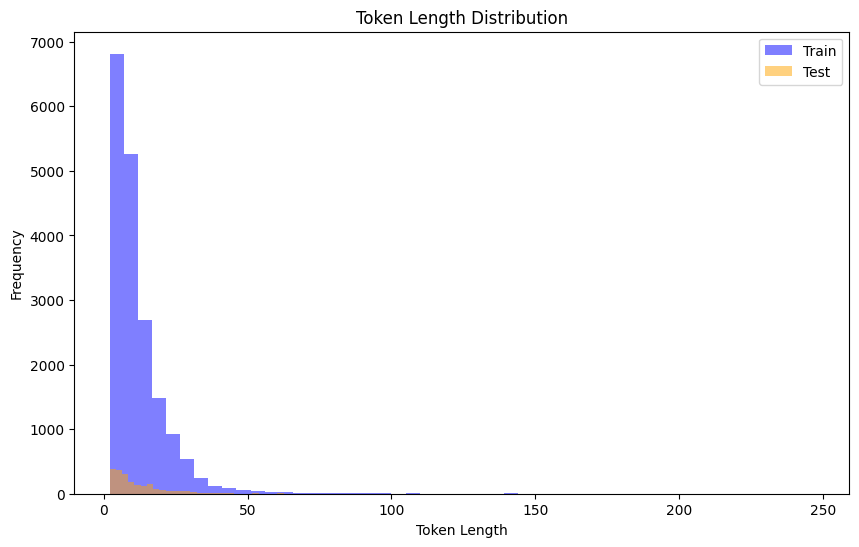

In [23]:
import matplotlib.pyplot as plt

# Calculate token lengths for train and test datasets
train_token_lengths = [len(t.split()) for t in X_train]
test_token_lengths = [len(t.split()) for t in X_test]

# Plot token length distribution
plt.figure(figsize=(10, 6))
plt.hist(train_token_lengths, bins=50, alpha=0.5, color='blue', label='Train')
plt.hist(test_token_lengths, bins=50, alpha=0.5, color='orange', label='Test')
plt.xlabel('Token Length')
plt.ylabel('Frequency')
plt.title('Token Length Distribution')
plt.legend()
plt.show()

In [24]:
model = t.get_classifier()

In [25]:
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=8)

In [26]:
# Adding early stopping callback from TensorFlow
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='accuracy', patience=5, mode='auto')

In [27]:
history = learner.fit_onecycle(2e-5, 10,callbacks=[early_stopping])



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/10
2303/2303 [==============================] - 1427s 607ms/step - loss: 1.3088 - accuracy: 0.4648 - val_loss: 0.9876 - val_accuracy: 0.6082
Epoch 2/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.9809 - accuracy: 0.6180 - val_loss: 0.8836 - val_accuracy: 0.6527
Epoch 3/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.8740 - accuracy: 0.6610 - val_loss: 0.8701 - val_accuracy: 0.6571
Epoch 4/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.8849 - accuracy: 0.6540 - val_loss: 0.8988 - val_accuracy: 0.6541
Epoch 5/10
2303/2303 [==============================] - 1393s 605ms/step - loss: 0.7707 - accuracy: 0.6986 - val_loss: 0.9053 - val_accuracy: 0.6429
Epoch 6/10
2303/2303 [==============================] - 1391s 604ms/step - loss: 0.6965 - accuracy: 0.7294 - val_loss: 0.8655 - val_accuracy: 0.6668
Epoch 7/10
2303/2303 [=====================

In [28]:
# Save the trained model
learner.save_model('/kaggle/output/model.zip')

In [29]:
classes=t.get_classes()

In [30]:
cm = learner.validate(class_names=t.get_classes())

64/64 [==============================] - 20s 269ms/step
              precision    recall  f1-score   support

       Anger       0.65      0.64      0.64       362
        Fear       0.35      0.30      0.32        20
         Joy       0.70      0.71      0.70       743
        Love       0.59      0.58      0.59       414
     Sadness       0.72      0.75      0.74       429
    Surprise       0.41      0.38      0.39        79

    accuracy                           0.66      2047
   macro avg       0.57      0.56      0.56      2047
weighted avg       0.66      0.66      0.66      2047



In [31]:
import os
import subprocess
from IPython.display import FileLink, display

def download_file(path, download_file_name):
    os.chdir('/kaggle/working/')
    zip_name = f"/kaggle/working/{download_file_name}.zip"
    command = f"zip {zip_name} {path} -r"
    result = subprocess.run(command, shell=True, capture_output=True, text=True)
    if result.returncode != 0:
        print("Unable to run zip command!")
        print(result.stderr)
        return
    display(FileLink(f'{download_file_name}.zip'))

In [32]:
!zip -r mental.zip /kaggle/output/model

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


	zip warning: name not matched: /kaggle/output/model

zip error: Nothing to do! (try: zip -r mental.zip . -i /kaggle/output/model)


In [33]:
!ls

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


__notebook__.ipynb


In [34]:
# from IPython.display import FileLink
# FileLink(r'/kaggle/working/mental-health-rand.zip')

In [35]:
# df_cm = pd.DataFrame(cm, index=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "],
#                      columns=["Anxiety","Bipolar","Borderline Personality", "Depression ", "Schizophernia","Suidal Thought","neutral",
#                                 "Alcoholism","Addiction","Aspergers","SelfHarm "])
# plt.figure(figsize = (10,7))
# sns.heatmap(df_cm,annot=True, fmt ="d")